In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [4]:
train_df = pd.read_csv('Training_Dataset.csv')

In [5]:
train_df.head()

,citizen_id,party_voted_past,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,...,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,actual_vote
0,C1,Tokugawa,0,0,18,0,0,0,0,9,...,0,3,25-35,1.0,0.0,Degree,6,AEC,AEC,Tokugawa
1,C2,Ebony,2,6,0,2,0,2,5,0,...,0,3,18-24,1.0,0.0,Masters,5,AEC,AEC,Ebony
2,C3,Cosmos,0,0,0,0,6,0,0,0,...,15,1,46-55,1.0,1.0,Masters,6,AMS,AMS,Cosmos
3,C4,Centaur,2,0,0,0,0,2,0,0,...,0,1,36-45,1.0,0.0,Degree,6,ACL,ANQ,Centaur
4,C5,Centaur,9,2,3,0,2,1,0,1,...,7,4,25-35,1.0,0.0,Primary,7,ARK,ARK,Centaur


In [6]:
test_df = pd.read_csv('Leaderboard_Dataset.csv')

In [7]:
test_df.head()

,citizen_id,party_voted_past,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,...,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33
0,C70001,Centaur,13,1,0,0,0,13,1,0,...,0,0,4,55+,1.0,0.0,Masters,5,ATI,ATI
1,C70002,Ebony,0,6,7,0,0,0,3,2,...,0,0,3,46-55,1.0,0.0,Masters,5,AVJ,ANQ
2,C70003,Centaur,5,0,0,0,0,3,0,0,...,0,0,3,18-24,0.0,1.0,Degree,7,AHS,AHS
3,C70004,Ebony,14,7,3,15,0,4,4,1,...,15,0,3,25-35,0.0,0.0,Primary,6,AZG,ASQ
4,C70005,Cosmos,0,0,0,0,7,0,0,0,...,0,15,3,18-24,1.0,1.0,Masters,8,AXT,AWX


In [8]:
train_df.count()

citizen_id          60129
party_voted_past    60129
mvar1               60129
mvar2               60129
mvar3               60129
mvar4               60129
mvar5               60129
mvar6               60129
mvar7               60129
mvar8               60129
mvar9               60129
mvar10              60129
mvar11              60129
mvar12              60129
mvar13              60129
mvar14              60129
mvar15              60129
mvar16              60129
mvar17              60129
mvar18              60129
mvar19              60129
mvar20              60129
mvar21              60129
mvar22              60129
mvar23              60129
mvar24              60129
mvar25              60129
mvar26              60129
mvar27              60129
mvar28              60099
mvar29              60099
mvar30              60099
mvar31              60129
mvar32              60129
mvar33              60129
actual_vote         60129
dtype: int64

In [9]:
train_df.isnull().sum()

citizen_id           0
party_voted_past     0
mvar1                0
mvar2                0
mvar3                0
mvar4                0
mvar5                0
mvar6                0
mvar7                0
mvar8                0
mvar9                0
mvar10               0
mvar11               0
mvar12               0
mvar13               0
mvar14               0
mvar15               0
mvar16               0
mvar17               0
mvar18               0
mvar19               0
mvar20               0
mvar21               0
mvar22               0
mvar23               0
mvar24               0
mvar25               0
mvar26               0
mvar27               0
mvar28              30
mvar29              30
mvar30              30
mvar31               0
mvar32               0
mvar33               0
actual_vote          0
dtype: int64

In [10]:
train_df.describe()
for col in train_df.columns:
    print train_df[col].dtype

object
object
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
object
float64
float64
object
int64
object
object
object


In [11]:
train_df['mvar30'].value_counts()

Masters    23913
Degree     18561
Diploma    11077
Primary     6548
Name: mvar30, dtype: int64

In [12]:
copy_df = train_df.copy()

In [13]:
train_df.dropna(inplace=True)

In [14]:
train_df.describe()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar28,mvar29,mvar31
count,60099.000000,60099.000000,60099.000000,60099.000000,60099.000000,60099.000000,60099.000000,60099.000000,60099.00000,60099.000000,...,60099.000000,60099.000000,60099.000000,60099.000000,60099.000000,60099.000000,60099.000000,60099.000000,60099.000000,60099.000000
mean,2.112098,2.214746,1.254064,2.419275,1.949933,1.135610,0.925589,0.471755,1.46079,1.038936,...,0.071648,5.591224,6.210020,3.115493,6.219937,5.305746,2.678347,0.703306,0.300787,6.599062
std,3.784988,3.898395,3.240429,4.218829,3.748771,2.313382,2.012554,1.391959,2.81057,2.251814,...,0.552473,6.961675,7.106141,5.951074,7.353391,6.873126,1.169210,0.456804,0.458604,1.653839
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,7.000000
75%,3.000000,3.000000,0.000000,3.000000,2.000000,1.000000,1.000000,0.000000,2.00000,1.000000,...,0.000000,15.000000,15.000000,0.000000,15.000000,15.000000,4.000000,1.000000,1.000000,8.000000
max,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,17.000000,21.00000,21.000000,...,18.000000,15.000000,15.000000,15.000000,15.000000,15.000000,8.000000,1.000000,1.000000,11.000000


In [15]:
train_df['mvar30'] = train_df['mvar30'].map({'Masters':0 , 'Degree':1 , 'Diploma':2 ,'Primary':3 }).astype(int)

In [16]:
train_df['mvar27'].value_counts()

25-35    18340
18-24    11794
46-55    11244
55+       9693
36-45     9028
Name: mvar27, dtype: int64

In [17]:
train_df['mvar27'] = train_df['mvar27'].map({'18-24':0 , '25-35':1 , '36-45':2 ,'46-55':3,'55+':4 }).astype(int)

In [18]:
train_df.drop(['citizen_id'],axis=1,inplace=True)

In [19]:
train_df['party_voted_past'].value_counts()
replace = {'Ebony':0 , 'Centaur':1 , 'Cosmos':2 , 'Odyssey':3 , 'Tokugawa':4}
train_df['party_voted_past'] = train_df['party_voted_past'].map(replace).astype(int)

In [20]:
train_df['mvar32'].unique()
column ='mvar32'
text_digit_vals = {}
def convert_to_int(val):
    return text_digit_vals[val]

#print(column,df[column].dtype)
if train_df[column].dtype != np.int64 and train_df[column].dtype != np.float64:

    column_contents = train_df[column].values.tolist()
    #finding just the uniques
    unique_elements = set(column_contents)
    # great, found them. 
    x = 0
    for unique in unique_elements:
        if unique not in text_digit_vals:
            # creating dict that contains new
            # id per unique string
            text_digit_vals[unique] = x
            x+=1
    # now we map the new "id" vlaue
    # to replace the string. 
    train_df[column] = list(map(convert_to_int,train_df[column]))


In [21]:
train_df['mvar33'].value_counts()
column ='mvar33'
text_digit_vals = {}
def convert_to_int(val):
    return text_digit_vals[val]

#print(column,df[column].dtype)
if train_df[column].dtype != np.int64 and train_df[column].dtype != np.float64:

    column_contents = train_df[column].values.tolist()
    #finding just the uniques
    unique_elements = set(column_contents)
    # great, found them. 
    x = 0
    for unique in unique_elements:
        if unique not in text_digit_vals:
            # creating dict that contains new
            # id per unique string
            text_digit_vals[unique] = x
            x+=1
    # now we map the new "id" vlaue
    # to replace the string. 
    train_df[column] = list(map(convert_to_int,train_df[column]))


In [22]:
train_df['actual_vote'].value_counts()
replace = {'Ebony':0 , 'Centaur':1 , 'Cosmos':2 , 'Odyssey':3 , 'Tokugawa':4}
train_df['actual_vote'] = train_df['actual_vote'].map(replace).astype(int)

In [23]:
train_df.astype(float)

,party_voted_past,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,actual_vote
0,4.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,3.0,1.0,1.0,0.0,1.0,6.0,290.0,292.0,4.0
1,0.0,2.0,6.0,0.0,2.0,0.0,2.0,5.0,0.0,2.0,...,0.0,3.0,0.0,1.0,0.0,0.0,5.0,290.0,292.0,0.0
2,2.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,15.0,1.0,3.0,1.0,1.0,0.0,6.0,363.0,373.0,2.0
3,1.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,1.0,2.0,1.0,0.0,1.0,6.0,398.0,314.0,1.0
4,1.0,9.0,2.0,3.0,0.0,2.0,1.0,0.0,1.0,0.0,...,7.0,4.0,1.0,1.0,0.0,3.0,7.0,344.0,354.0,1.0
5,4.0,0.0,3.0,8.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,3.0,3.0,1.0,1.0,0.0,8.0,313.0,314.0,4.0
6,2.0,0.0,3.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,...,3.0,2.0,1.0,1.0,0.0,2.0,7.0,385.0,395.0,2.0
7,2.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,1.0,0.0,...,15.0,1.0,1.0,1.0,0.0,2.0,6.0,226.0,314.0,4.0
8,1.0,13.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,5.0,290.0,29.0,1.0
9,0.0,8.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,4.0,3.0,0.0,1.0,3.0,6.0,398.0,278.0,1.0


CPU times: user 44 ms, sys: 68 ms, total: 112 ms
Wall time: 65 ms


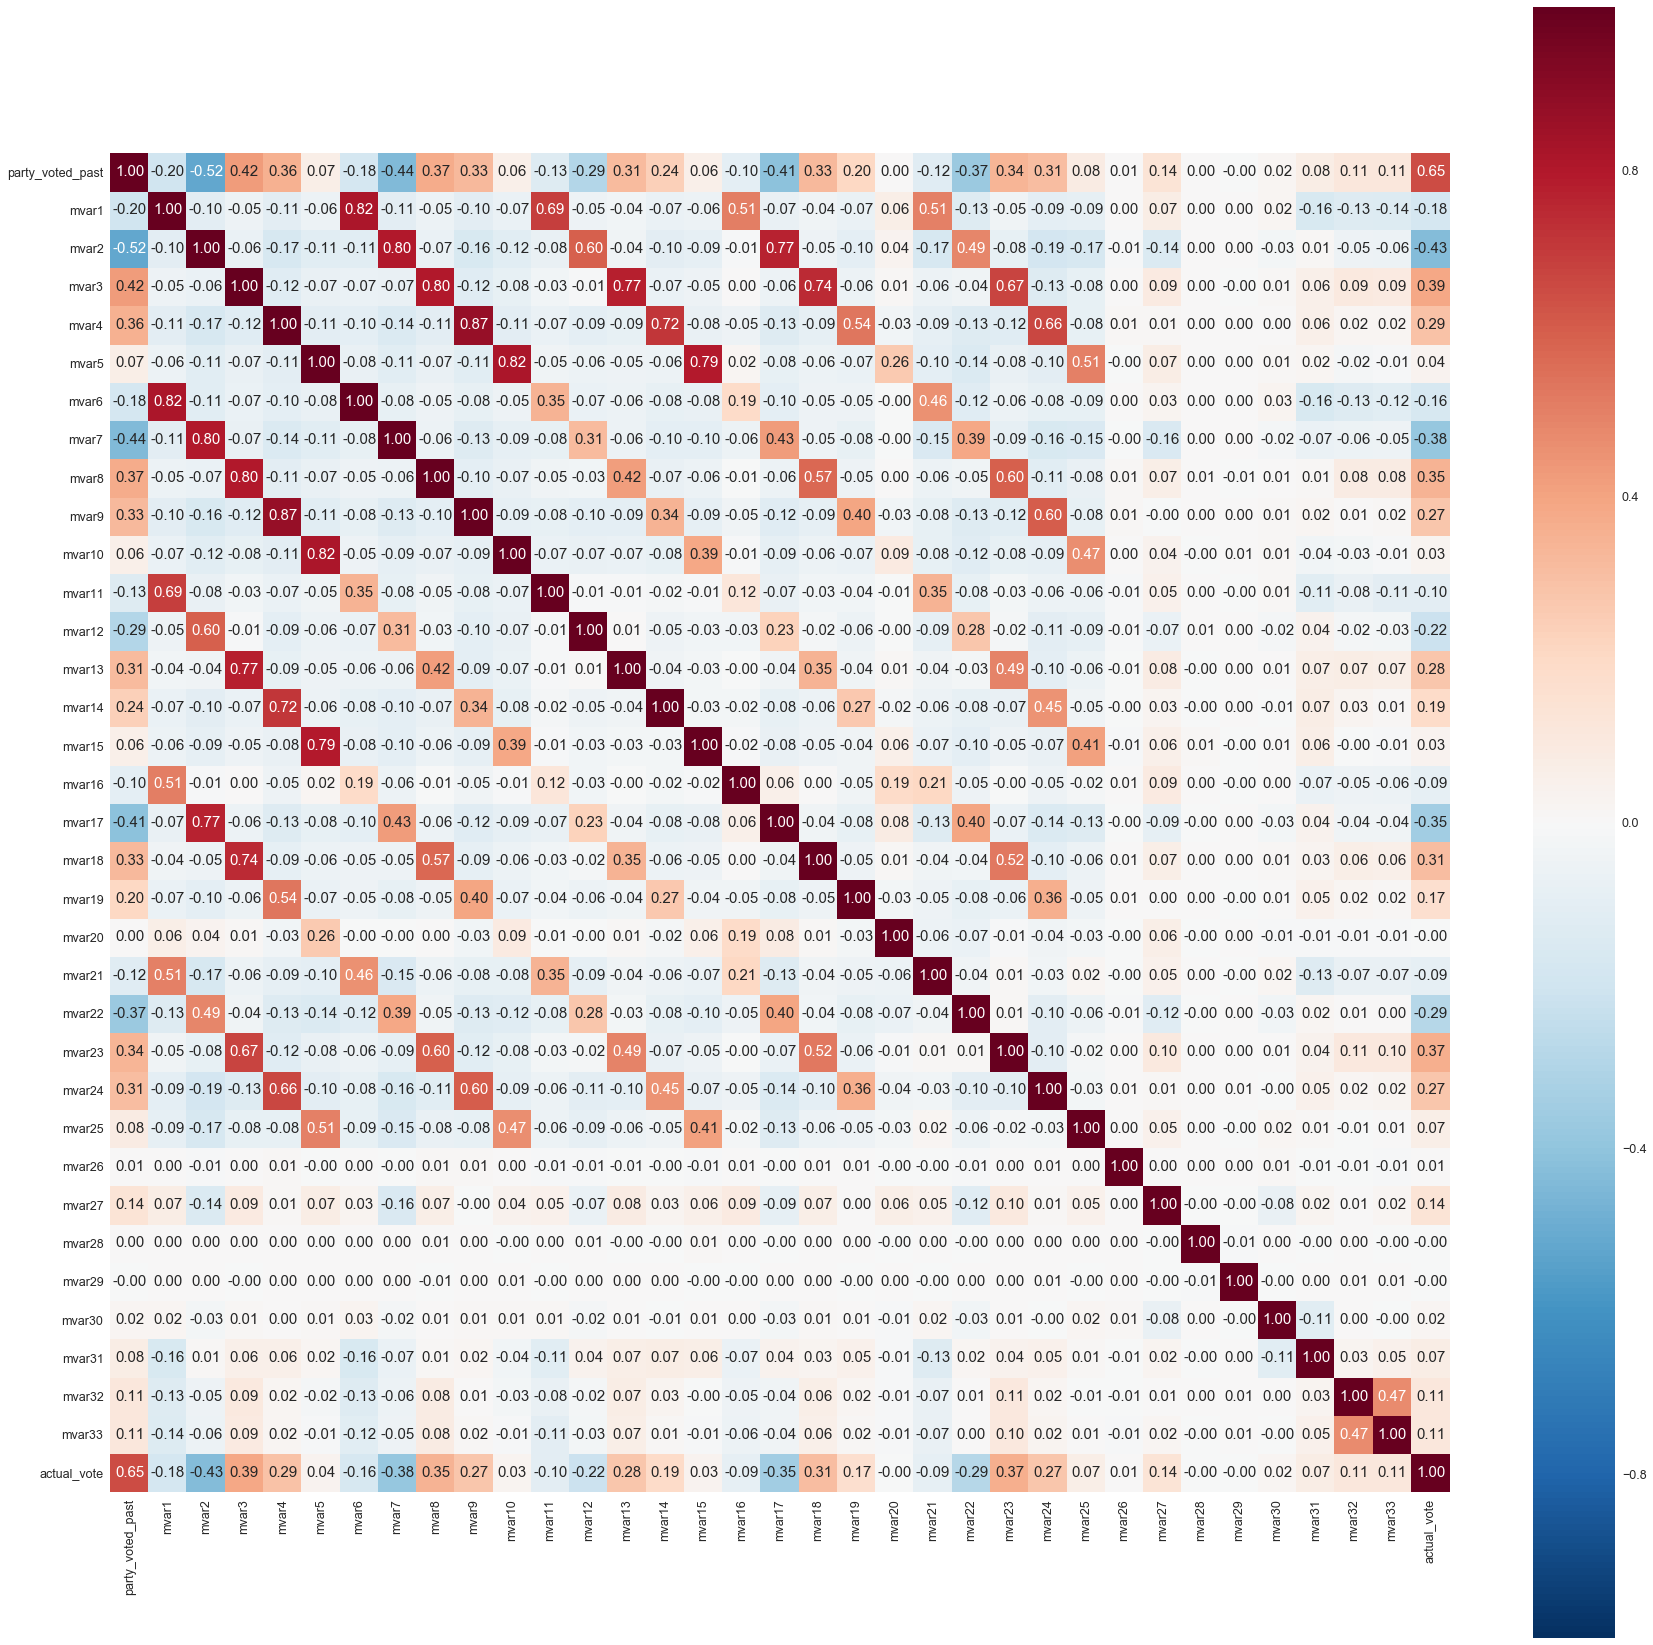

In [24]:
% time cm = np.corrcoef(train_df.values.T)
sns.set(font_scale=1.25)
a4_dims = (30,30)
fig ,ax = plt.subplots(figsize=a4_dims)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',ax =ax, yticklabels=train_df.columns.values, xticklabels=train_df.columns.values)
plt.show()

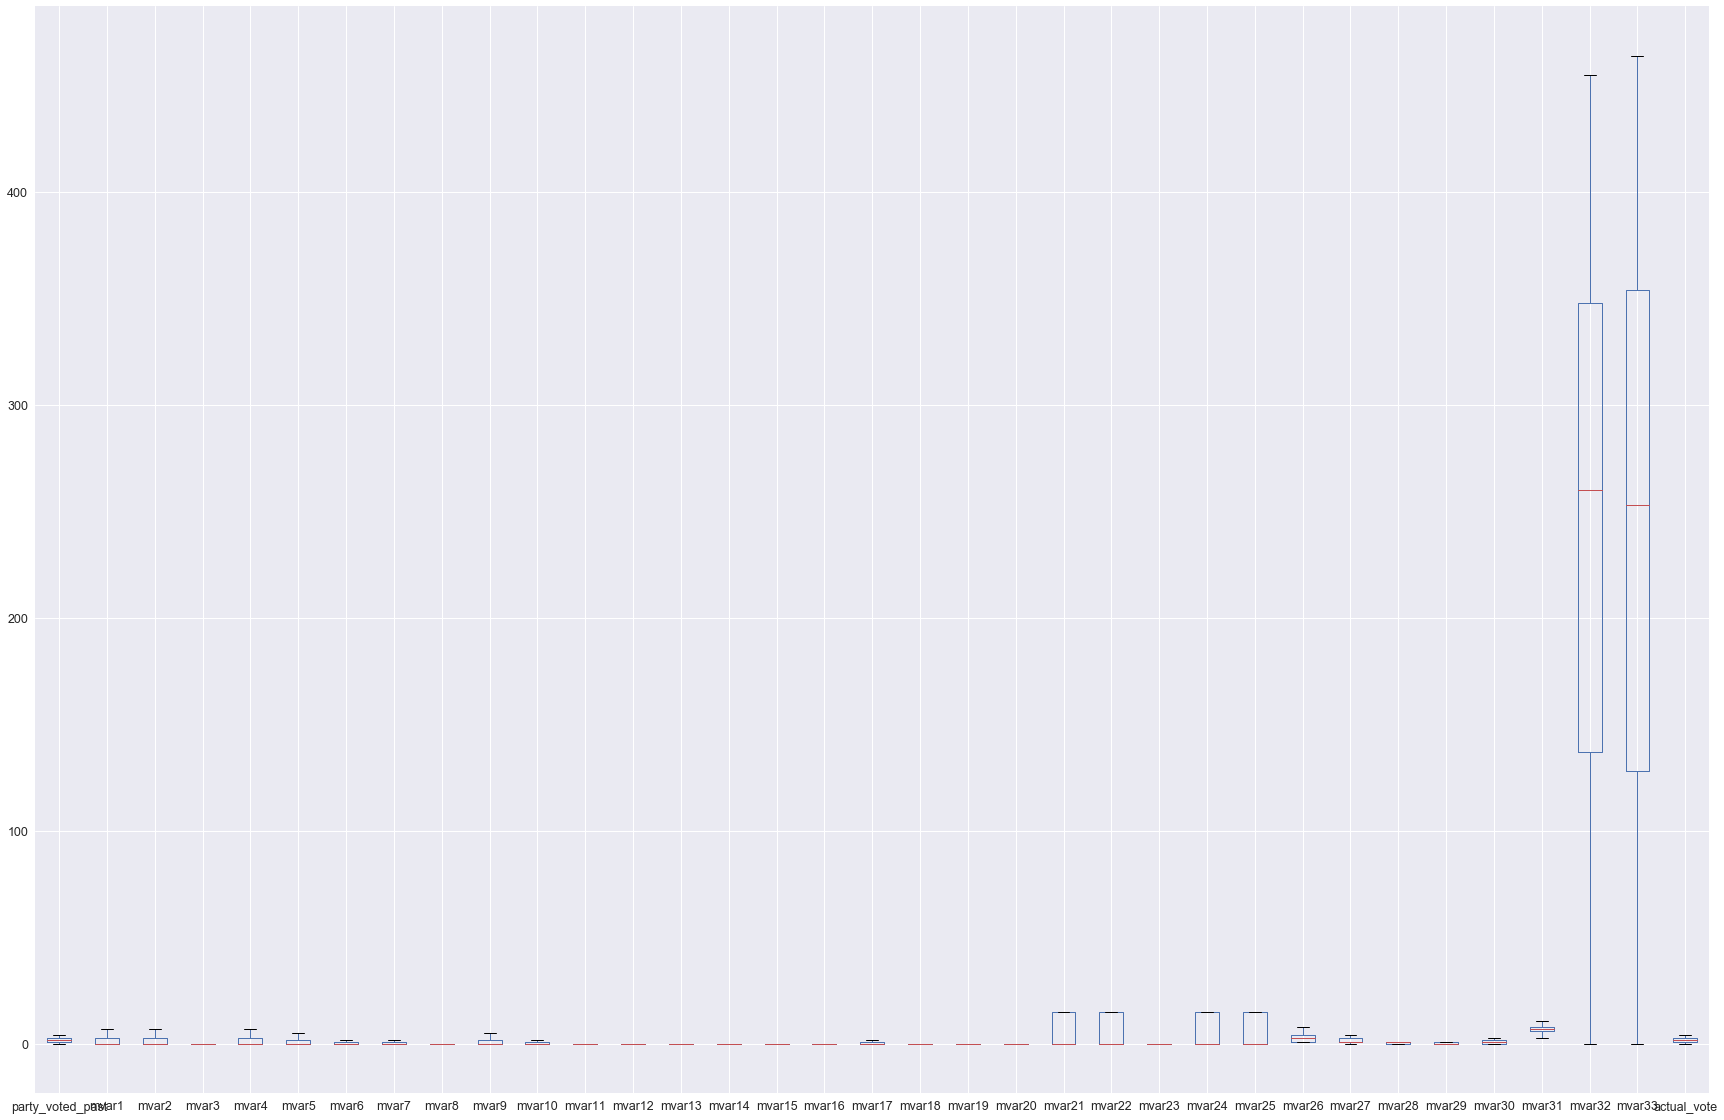

In [25]:
plt.figure(figsize=(30,20))
train_df.boxplot()
plt.show()

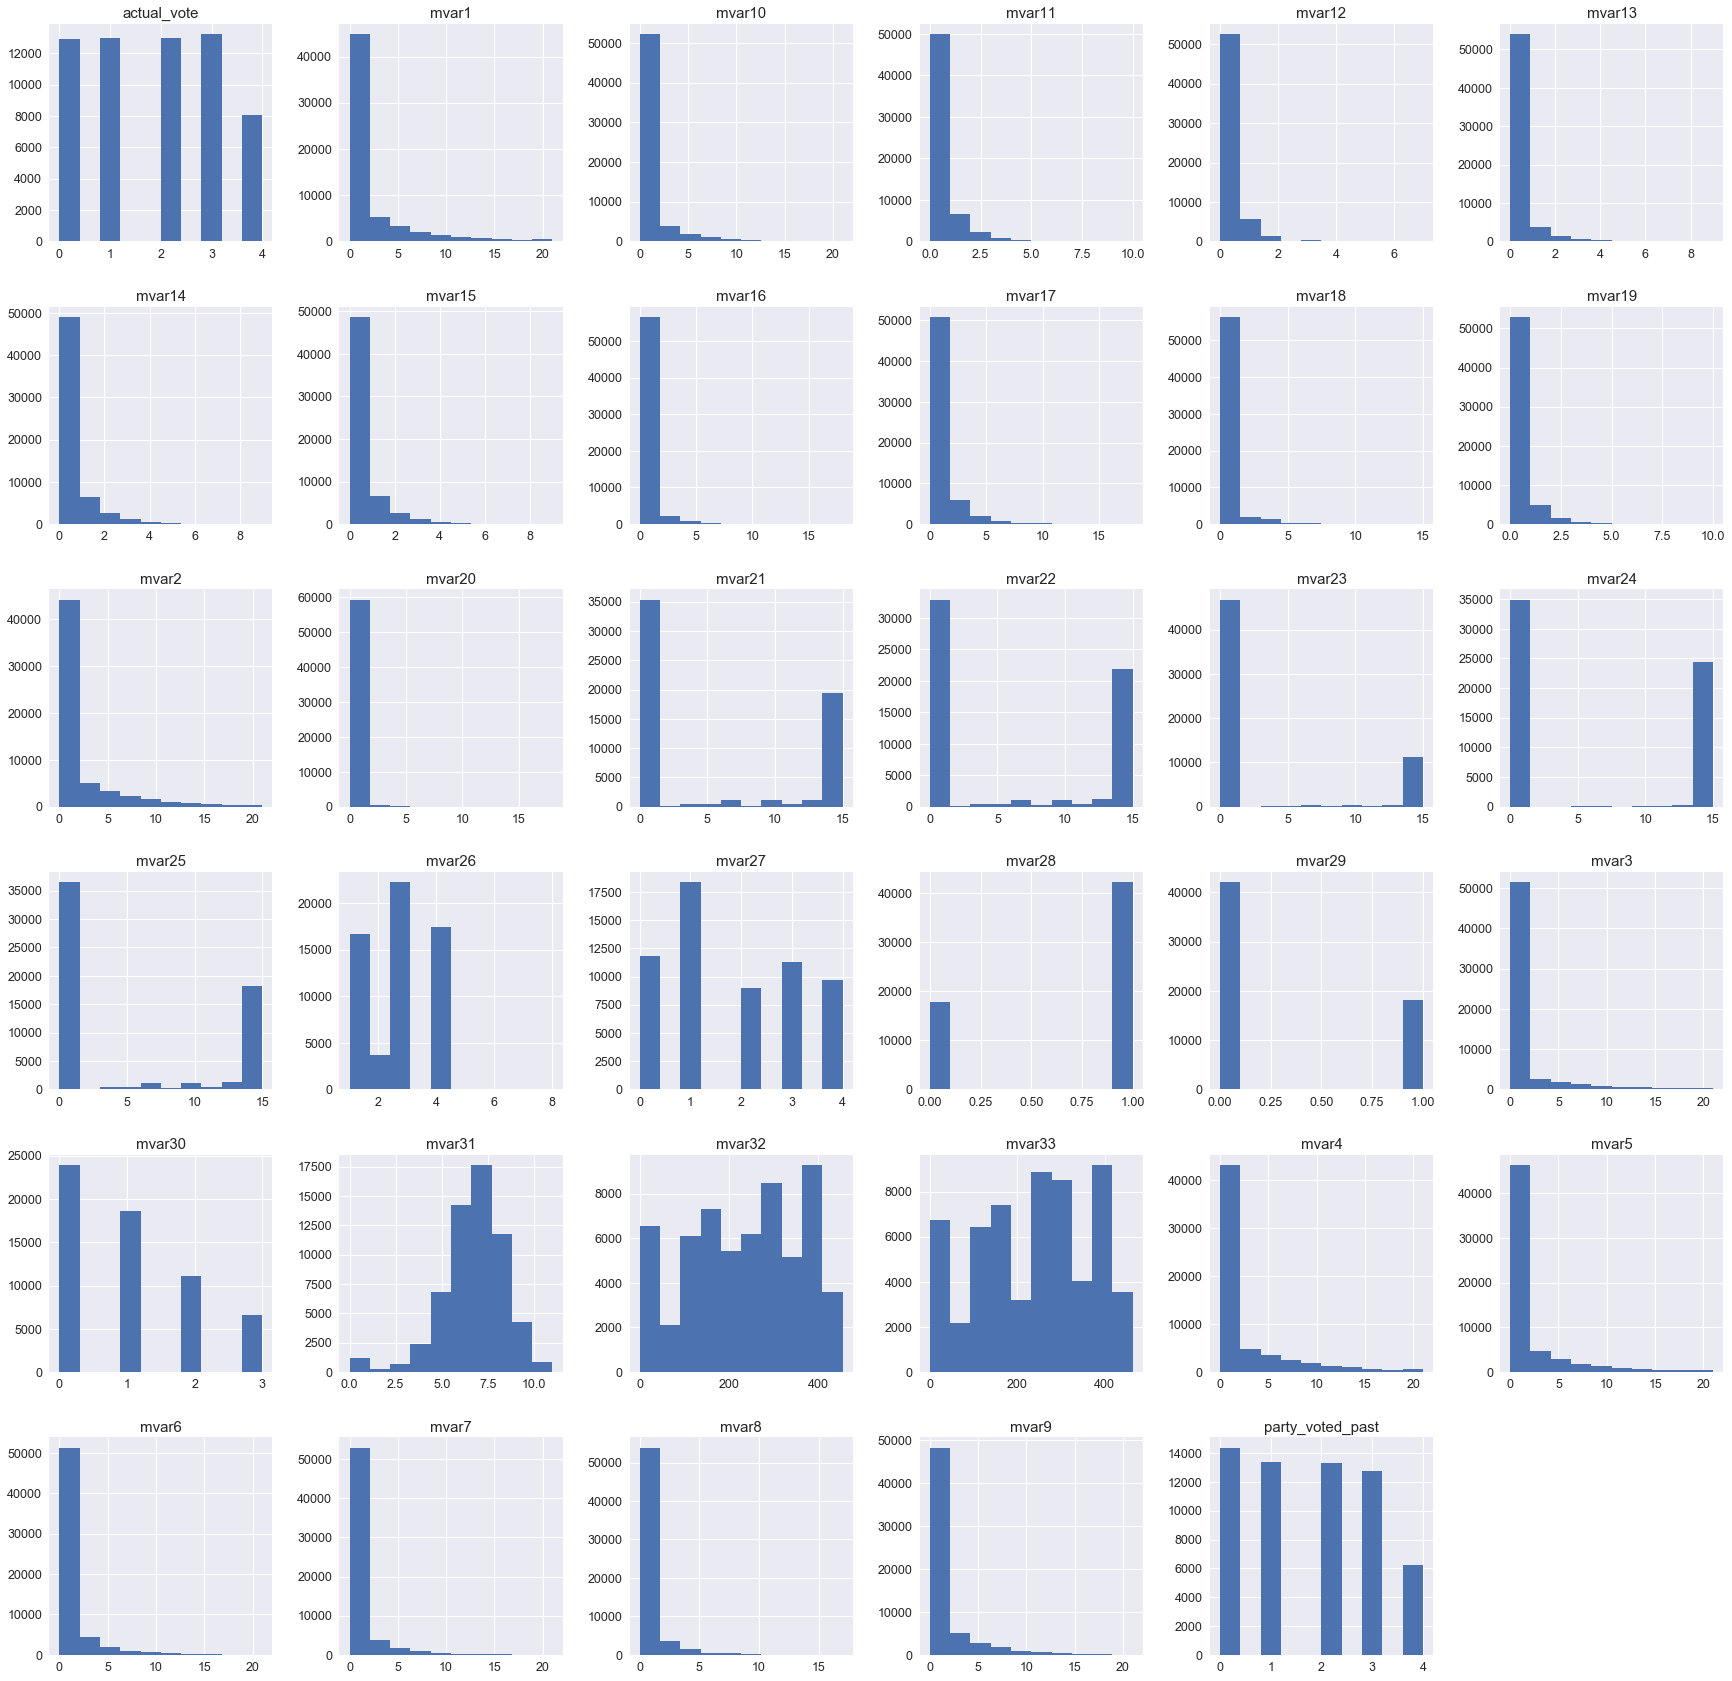

In [26]:
plt.figure(figsize=(30,30))
train_df.hist(figsize=(30,30))
plt.show()

In [27]:
train_df[['mvar32','mvar33']] = preprocessing.scale(train_df[['mvar32','mvar33']])

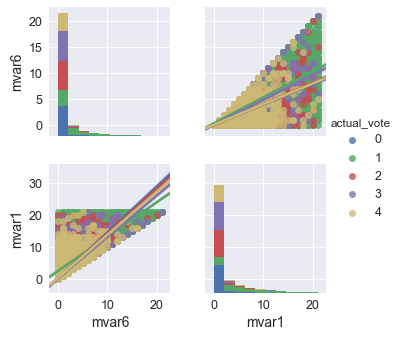

In [28]:
sns.pairplot(train_df,hue='actual_vote', vars =['mvar6','mvar1'],kind='reg')
plt.show()

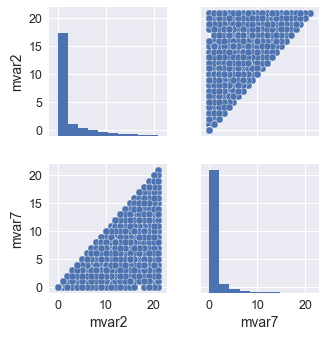

In [29]:
sns.pairplot(train_df, vars =['mvar2','mvar7'],kind='scatter')
plt.show()

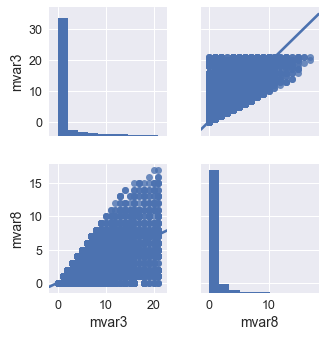

In [30]:
sns.pairplot(train_df, vars =['mvar3','mvar8'],kind='reg')
plt.show()

In [32]:
train_df.describe()

,party_voted_past,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,actual_vote
count,60099.000000,60099.000000,60099.000000,60099.000000,60099.000000,60099.000000,60099.000000,60099.000000,60099.000000,60099.00000,...,60099.000000,60099.000000,60099.00000,60099.000000,60099.000000,60099.000000,60099.000000,6.009900e+04,6.009900e+04,60099.000000
mean,1.718564,2.112098,2.214746,1.254064,2.419275,1.949933,1.135610,0.925589,0.471755,1.46079,...,5.305746,2.678347,1.81201,0.703306,0.300787,1.004326,6.599062,-1.021496e-16,3.369518e-17,1.841778
std,1.314588,3.784988,3.898395,3.240429,4.218829,3.748771,2.313382,2.012554,1.391959,2.81057,...,6.873126,1.169210,1.37370,0.456804,0.458604,1.008969,1.653839,1.000008e+00,1.000008e+00,1.344020
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-1.859786e+00,-1.858359e+00,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,6.000000,-7.885686e-01,-8.614838e-01,1.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,3.000000,1.00000,1.000000,0.000000,1.000000,7.000000,1.731811e-01,1.120274e-01,2.000000
75%,3.000000,3.000000,3.000000,0.000000,3.000000,2.000000,1.000000,1.000000,0.000000,2.00000,...,15.000000,4.000000,3.00000,1.000000,1.000000,2.000000,8.000000,8.612621e-01,8.986244e-01,3.000000
max,4.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,17.000000,21.00000,...,15.000000,8.000000,4.00000,1.000000,1.000000,3.000000,11.000000,1.697906e+00,1.755314e+00,4.000000


In [33]:
threshold = 7.5

In [34]:
from sklearn import datasets, linear_model

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
from sklearn.feature_selection import RFE

In [37]:
from sklearn.svm import SVR

In [38]:
estimator = SVR(kernel="linear")

In [ ]:
selector = RFE(estimator, 25, step=2)